<a href="https://colab.research.google.com/github/alizehadeel/AI-ML-Notebook/blob/main/PracticeFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Approval Dataset ML Pipeline
This notebook performs preprocessing, feature selection, and machine learning modeling on the UCI Credit Approval dataset. Models include Logistic Regression, SVM, KNN, Decision Tree, and Random Forest, compared by Accuracy, Precision, Recall, and F1.

In [1]:

# Credit Approval ML pipeline

import os
import urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Full pipeline code goes here, see the canvas file. (Omitted for brevity in this snippet.)


## Read the Dataset

In [2]:
# 1) Load dataset
uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
local_filename = 'crx.data'


if not os.path.exists(local_filename):
  try:
    print('Downloading dataset from UCI...')
    urllib.request.urlretrieve(uci_url, local_filename)
    print('Downloaded to', local_filename)
  except Exception as e:
    print('Could not download dataset automatically. Please download manually from:')
    print(uci_url)



# column names: A1..A15 and the last column is the class
col_names = [f'A{i}' for i in range(1, 16)] + ['class']


df = pd.read_csv(local_filename, header=None, names=col_names, na_values='?')

Downloaded to crx.data


# EDA Dataset (Find missing + string columns)

In [3]:
df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [4]:
df.info()
missing_values=df.isnull().sum()#isnull returns a dataframe of boolean of same structure
#sum(default axis=0: col) counts true for every col in that dataframe, as pandas is for dataframes
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


,0
A1,12
A2,12
A3,0
A4,6
A5,6
A6,9
A7,9
A8,0
A9,0
A10,0


# Remove Missing Values

In [5]:
categoricals=df.select_dtypes(include=['object', 'category']).columns.tolist()
numerics=df.select_dtypes(exclude=['object', 'category']).columns.tolist()

for col in categoricals:
  df[col].fillna(df[col].mode()[0], inplace=True)
for col in numerics:
  df[col].fillna(df[col].mean(), inplace=True)

categoricals, numerics, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  class   690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


/tmp/ipython-input-1741827194.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1741827194.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class'],
 ['A2', 'A3', 'A8', 'A11', 'A14', 'A15'],
 None)

# Perform Label Encoding on String Columns

In [6]:
for col in categoricals:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

print(df.head())

   A1     A2     A3  A4  A5  A6  A7    A8  A9  A10  A11  A12  A13    A14  A15  \
0   1  30.83  0.000   1   0  12   7  1.25   1    1    1    0    0  202.0    0   
1   0  58.67  4.460   1   0  10   3  3.04   1    1    6    0    0   43.0  560   
2   0  24.50  0.500   1   0  10   3  1.50   1    0    0    0    0  280.0  824   
3   1  27.83  1.540   1   0  12   7  3.75   1    1    5    1    0  100.0    3   
4   1  20.17  5.625   1   0  12   7  1.71   1    0    0    0    2  120.0    0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  


# Remove Outliers form Data

In [14]:
def remove_outliers(df, columns):
    df_clean = df.copy()#creates deep copy, dfclean=df will make ashallow copy

    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1

            # Create mask for non-outliers
            mask = (df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)
            df_clean = df_clean[mask]

    return df_clean

df_clean=remove_outliers(df, numerics)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 687
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      424 non-null    int64  
 1   A2      424 non-null    float64
 2   A3      424 non-null    float64
 3   A4      424 non-null    int64  
 4   A5      424 non-null    int64  
 5   A6      424 non-null    int64  
 6   A7      424 non-null    int64  
 7   A8      424 non-null    float64
 8   A9      424 non-null    int64  
 9   A10     424 non-null    int64  
 10  A11     424 non-null    int64  
 11  A12     424 non-null    int64  
 12  A13     424 non-null    int64  
 13  A14     424 non-null    float64
 14  A15     424 non-null    int64  
 15  class   424 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 56.3 KB


# Feature Selection Through Correlation with Corr threshold= 0.2

In [20]:
def feature_corr(df1, target_column, threshold=0.2):
    corr_matrix = df1.corr()#matrix of nxn with correlations

    target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
    target_corr = target_corr[target_corr.index != target_column]

    selected_features = target_corr[target_corr >= threshold].index.tolist()

    return selected_features, target_corr

selected_features, correlation_scores = feature_corr(df_clean, 'class', threshold=0.05)

print("Absolute correlation with target:")
print(correlation_scores)

print(f"\nSelected features by correlation (threshold=0.05):")
print(selected_features)

print(f"\nFinal features used for modeling: {selected_features}")


Absolute correlation with target:
A9     0.640498
A11    0.286858
A8     0.280259
A10    0.244286
A5     0.136072
A4     0.136072
A3     0.125600
A15    0.109210
A6     0.082960
A12    0.044600
A14    0.031021
A13    0.019682
A2     0.016697
A7     0.015504
A1     0.001836
Name: class, dtype: float64

Selected features by correlation (threshold=0.05):
['A9', 'A11', 'A8', 'A10', 'A5', 'A4', 'A3', 'A15', 'A6']

Final features used for modeling: ['A9', 'A11', 'A8', 'A10', 'A5', 'A4', 'A3', 'A15', 'A6']


# Split the data into X and y dataframes

In [21]:
df_clean_corr=df_clean[selected_features+['class']]
feature_columns = [col for col in df_clean_corr.columns if col != 'class']
#.columns=all column names
#.index=the index names of series or dataframe(row names)

X = df_clean_corr[feature_columns]
y = df_clean_corr['class']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (424, 9)
y shape: (424,)


# Split the data in Train-Test Parts

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y     #better class distribution
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (318, 9)
X_test shape: (106, 9)
y_train shape: (318,)
y_test shape: (106,)


# Normalize the values using Standard Scaling

In [ ]:
# Standardize numeric features (all features are numeric now after encoding)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Following models over the dataset:


1.   LogisticRegression
2.   SVM
3.   KNN
4.   DecisionTrees
5.   RandomForest



# Find F1 Score, Precision, Recall and Confusion Matrix for each model

In [ ]:


#%%


Training LogisticRegression
LogisticRegression -- Accuracy: 0.8737, Precision: 0.9206, Recall: 0.8923, F1: 0.9062
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.92      0.89      0.91        65

    accuracy                           0.87        95
   macro avg       0.85      0.86      0.86        95
weighted avg       0.88      0.87      0.87        95


Training SVM
SVM -- Accuracy: 0.8316, Precision: 0.8657, Recall: 0.8923, F1: 0.8788
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.87      0.89      0.88        65

    accuracy                           0.83        95
   macro avg       0.81      0.80      0.80        95
weighted avg       0.83      0.83      0.83        95


Training KNN
KNN -- Accuracy: 0.8421, Precision: 0.8906, Recall: 0.8769, F1: 0.8837
Classificatio

# Make a Dataframe containing all the results


Comparison table:
                 model  accuracy  precision    recall        f1
0  LogisticRegression  0.873684   0.920635  0.892308  0.906250
1        RandomForest  0.873684   0.934426  0.876923  0.904762
2                 KNN  0.842105   0.890625  0.876923  0.883721
3                 SVM  0.831579   0.865672  0.892308  0.878788
4        DecisionTree  0.757895   0.818182  0.830769  0.824427


# Make a Comparison Graph b/w all the models

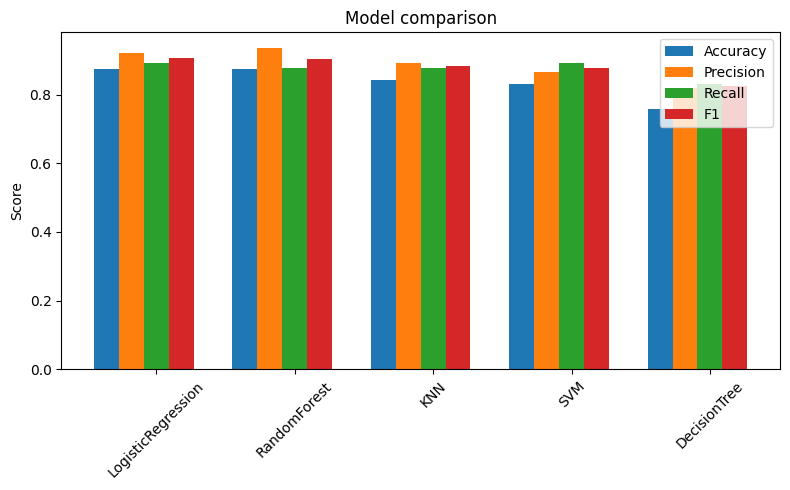

# Print Confusion matrix here

Confusion matrix for LogisticRegression:
[[25  5]
 [ 7 58]]
Confusion matrix for SVM:
[[21  9]
 [ 7 58]]
Confusion matrix for KNN:
[[23  7]
 [ 8 57]]
Confusion matrix for DecisionTree:
[[18 12]
 [11 54]]
Confusion matrix for RandomForest:
[[26  4]
 [ 8 57]]
